In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.precision = 3

# pseudo

In [2]:
training = pd.read_csv('../data/pseudo/Perron_phenotype-GSU-training.csv')
training.head()

,strain,live,dead,ld.od,phe,od.avg,od.harvest,ecr,pvd,pch,...,cont.auc,carb.auc,toby.auc,carb.lag.delta,toby.lag.delta,bfrac,ecr.n,pch.n,pvd.n,sa.vir
0,1,45.380,16.230,0.192,0.132,0.353,1.121,0.01,6.96,12.335,...,0.736,0.458,0.766,19,4,0.352,0.009,11.004,6.209,6.437e-04
1,2,69.179,24.018,0.340,0.139,0.535,1.401,0.01,9.16,11.585,...,0.975,0.230,0.599,-2,14,0.388,0.007,8.272,6.541,6.463e-04
2,3,80.385,14.142,0.367,0.148,0.596,0.878,0.01,2.01,1.998,...,0.481,0.129,0.581,-2,7,0.381,0.011,2.274,2.288,6.914e-04
3,5,80.639,16.880,0.313,0.127,0.653,1.210,0.04,3.05,4.285,...,0.627,0.157,0.348,-9,-4,0.324,0.033,3.542,2.521,6.619e-04
4,7,62.412,19.353,0.222,0.122,0.389,1.281,0.02,6.35,39.130,...,0.726,0.413,0.878,0,3,0.364,0.016,30.547,4.957,6.106e-04


In [3]:
responses = pd.read_csv('../data/pseudo/responses-pseudo.csv')
responses.head()

,OriginalID,LabID,carb,toby
0,TA151,210.0,True,False
1,IC1,55.0,False,False
2,A237,14.0,True,False
3,5920,NaN,NaN,NaN
4,LiA96,175.0,False,False


In [4]:
combined = responses.merge(training[['strain', 'carb.lag.delta', 'toby.lag.delta']],
                           left_on='LabID', right_on='strain', how='left')
combined.head(10)

,OriginalID,LabID,carb,toby,strain,carb.lag.delta,toby.lag.delta
0,TA151,210.0,True,False,210.0,-2.0,16.0
1,IC1,55.0,False,False,55.0,2.0,14.0
2,A237,14.0,True,False,14.0,-1.0,4.0
3,5920,NaN,NaN,NaN,NaN,NaN,NaN
4,LiA96,175.0,False,False,175.0,0.0,18.0
5,LiA91,174.0,False,False,174.0,1.0,19.0
6,Jp222,123.0,False,False,123.0,1.0,22.0
7,LiA179,158.0,False,False,158.0,2.0,25.0
8,CN573_PSE143,32.0,False,True,32.0,20.0,-5.0
9,Jp1170,131.0,False,False,131.0,18.0,34.0


In [5]:
(combined['carb'].dropna() == (combined['carb.lag.delta'].dropna()<0)).all()\
and\
(combined['toby'].dropna() == (combined['toby.lag.delta'].dropna()<0)).all()

True

In [6]:
combined[['carb.lag.delta', 'toby.lag.delta']].mean()

carb.lag.delta     4.286
toby.lag.delta    13.151
dtype: float64

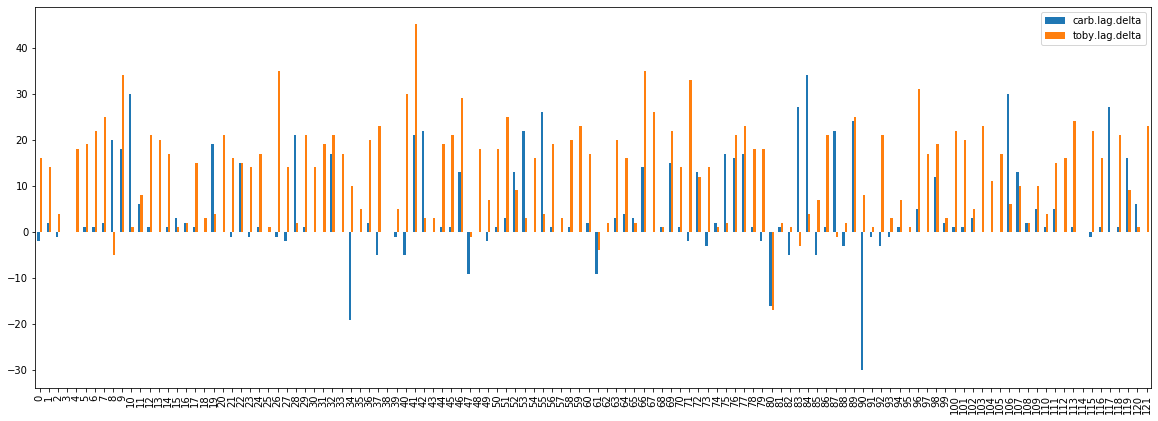

In [7]:
ax = combined[['carb.lag.delta', 'toby.lag.delta']].plot(kind='bar', figsize=(20, 7))

In [8]:
testing = pd.read_csv('../data/pseudo/Perron_phenotype-GSU-testing.csv')
testing.head()

,strain,live,dead,phe,od.harvest,env,cont.max.rate,cont.max.od,carb.max.rate,carb.max.od,...,toby.auc.delta,carb.lag.delta,toby.lag.delta,bfrac,ecr.n,pch.n,pvd.n,sa.vir,Niche,Sub-Niche
0,7,62.412,19.353,0.122,1.281,host,0.226,1.036,0.127,0.561,...,-0.152,0,3,0.364,0.016,30.547,4.957,6.106e-04,Clinical,Infection
1,11,92.477,17.748,0.150,0.700,host,0.205,1.046,0.117,0.637,...,0.326,0,14,0.416,0.071,5.144,2.429,5.022e-04,Clinical,Infection
2,49,61.479,15.370,0.114,1.442,host,0.239,1.213,0.216,0.645,...,0.037,0,1,0.221,0.000,6.072,3.634,7.028e-04,Clinical,Infection
3,51,82.887,17.918,0.156,1.387,host,0.234,1.117,0.226,1.217,...,0.019,1,1,0.313,0.007,6.666,4.356,6.481e-04,Clinical,Infection
4,92,90.865,16.119,0.261,1.252,host,0.301,1.187,0.288,1.158,...,0.292,1,15,0.286,0.008,5.237,5.002,6.381e-04,Clinical,Infection


# staph

In [9]:
nrs_meta = pd.read_csv('../data/staph//nrs_metadata3.txt', delimiter='\t')
nrs_meta.head()

,sample_tag,st,cc,MRSA,agr,Total.Area,glp,isdC,hypoth_protein,n43375,hemC,bip1487,bip1490,bip1504,bip1600,bip652
0,NRS001,5,5,True,2.0,0.000,0,0,0,True,0,0,0,0,0,0
1,NRS002,5,5,True,2.0,0.000,0,0,0,True,0,0,0,0,0,0
2,NRS003,5,5,True,2.0,0.000,0,0,0,True,0,0,0,0,0,0
3,NRS021,8,8,True,1.0,473.152,0,0,0,True,0,0,0,0,0,0
4,NRS022,45,45,False,1.0,6686.806,0,0,0,True,0,1,1,1,1,0


/mnt/ws/home/zzhang3/anaconda3/lib/python3.7/site-packages/numpy/lib/stride_tricks.py:262: UserWarning: Warning: converting a masked element to nan.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


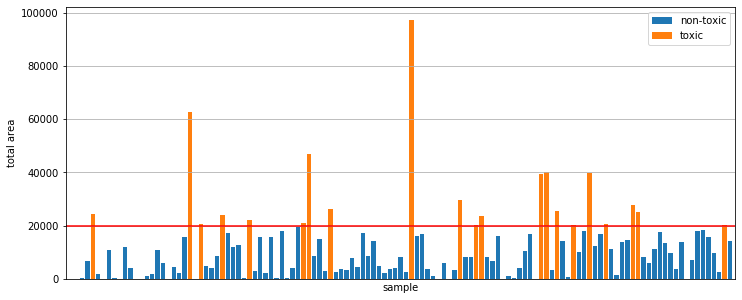

False    103
True      21
Name: Total.Area, dtype: int64

In [10]:
data = nrs_meta['Total.Area']
threshold = 20000

rows = data.shape[0]
toxic = data > threshold

plt.figure(figsize=(12, 5))
nt = np.ma.array(data, mask=toxic, fill_value=0.)
plt.bar(range(rows), nt, label='non-toxic')
t = np.ma.array(data, mask=~toxic, fill_value=0.)
plt.bar(range(rows), t, label='toxic')
plt.hlines(threshold, 0, rows, color='red')

plt.xticks([])
plt.xlabel('sample')
plt.ylabel('total area')
plt.xlim([0,rows])
plt.grid(axis='y')

plt.legend()
plt.show()
toxic.value_counts()